# Матрицы numpy

## Создание

In [3]:
import numpy as np

# в numpy матрицы могут содержать только один тип данных
# размерность массива задается не двумя аргументами функции, а одним — кортежем!

# 1 способ
a = np.array([[1,2,3], [4,5,6], [7,8,9]])

# 2 способ
v = np.arange(0, 24, 2)  # вектор с одной строкой (от 0 до 24 с шагом 2)
d = v.reshape((3, 4))  # теперь матрица 3х4

# единичная матрица 3х2
I = np.eye(3, 2)  # some exception to the tuple rule

# матрица из единиц
ones = np.ones((3, 3))

# матрица из нулей
zeros = np.zeros((3, 3))

print(a, v, d, I, ones, zeros, sep='\n\n')

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[ 0  2  4  6  8 10 12 14 16 18 20 22]

[[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]]

[[1. 0.]
 [0. 1.]
 [0. 0.]]

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


## Индексирование

In [20]:
print("Второй элемент третьей строки матрицы:", d[2, 1])
print("Вторая строка матрицы d:\n", d[1, :])
print("Четвертый столбец матрицы d:\n", d[:, 3])

# d[1, 0], d[2, 3] эквивалент: d[[1, 0], [2, 3]]
print("Элементы матрицы d с координатами (1, 2) и (0, 3):\n", d[[1, 0], [2, 3]])

Второй элемент третьей строки матрицы: 18
Вторая строка матрицы d:
 [ 8 10 12 14]
Четвертый столбец матрицы d:
 [ 6 14 22]
Элементы матрицы d с координатами (1, 2) и (0, 3):
 [12  6]


## Умножение

### Матричное умножение

In [21]:
a = np.array([[1, 0], [0, 1]])  # матрица 2х2
b = np.array([[4, 1], [2, 2]])  # матрица 2х2
r1 = np.dot(a, b)  # получим матрицу 2х2

print("Матрица A:\n", a)
print("Матрица B:\n", b)
print("Результат умножения функцией:\n", r1)

Матрица A:
 [[1 0]
 [0 1]]
Матрица B:
 [[4 1]
 [2 2]]
Результат умножения функцией:
 [[4 1]
 [2 2]]


### Матрица на вектор

In [23]:
c = np.array([1, 2])
r2 = np.dot(b, c)  # матричное умножение

print("Матрица:\n", b)
print("Вектор:\n", c)
print("Результат умножения:\n", r2)

Матрица:
 [[4 1]
 [2 2]]
Вектор:
 [1 2]
Результат умножения:
 [6 6]


In [27]:
r3 = a * b  # покоординатное умножение
print("Матрица A:\n", a)
print("Матрица B:\n", b)
print("Результат покоординатного умножения через операцию *:\n", r3)

Матрица A:
 [[1 0]
 [0 1]]
Матрица B:
 [[4 1]
 [2 2]]
Результат покоординатного умножения через операцию *:
 [[4 0]
 [0 2]]


### Транспонирование

In [28]:
a = np.array([[1, 2], [3, 4]])
b = np.transpose(a)
c = a.T

print("Матрица:\n", a)
print("Транспонирование функцией:\n", b)
print("Транспонирование методом:\n",  c)

Матрица:
 [[1 2]
 [3 4]]
Транспонирование функцией:
 [[1 3]
 [2 4]]
Транспонирование методом:
 [[1 3]
 [2 4]]


### Определитель квадратной матрицы

In [29]:
a = np.array([[1, 2, 1], [1, 1, 4], [2, 3, 6]], dtype=np.float32)
det = np.linalg.det(a)

print("Матрица:\n", a)
print("Определитель:\n", det)

# в теории напомнили: площадь параллелограмм - определитель 2х2, аналогично параллелепипед - 3х3

Матрица:
 [[1. 2. 1.]
 [1. 1. 4.]
 [2. 3. 6.]]
Определитель:
 -1.0


### Ранг матрицы

In [31]:
# максимальное число линейно независимых строк (столбцов) этой матрицы

a = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
rank = np.linalg.matrix_rank(a)

print("Матрица:\n", a)
print("Ранг матрицы:", rank)

Матрица:
 [[1 0 0]
 [0 1 0]
 [0 0 1]]
Ранг матрицы: 3


С помощью вычисления ранга матрицы можно проверять линейную независимость системы векторов.

Допустим, у нас есть несколько векторов. Составим из них матрицу, где наши векторы будут являться строками. Понятно, что векторы линейно независимы тогда и только тогда, когда ранг полученной матрицы совпадает с числом векторов. Приведем пример:

In [32]:
a = np.array([1, 2, 3])
b = np.array([1, 1, 1])
c = np.array([2, 3, 5])
m = np.array([a, b, c])

print(np.linalg.matrix_rank(m) == m.shape[0])

True


### СЛАУ

Системой линейных алгебраических уравнений называется система вида Ax=b. В случае квадратной невырожденной матрицы A решение системы единственно.

In [34]:
a = np.array([[3, 1], [1, 2]])
b = np.array([9, 8])
x = np.linalg.solve(a, b)

print("Матрица A:\n", a)
print("Вектор b:\n", b)
print("Решение системы:\n", x)
print("Проверка:\n", np.dot(a,x))

Матрица A:
 [[3 1]
 [1 2]]
Вектор b:
 [9 8]
Решение системы:
 [2. 3.]
Проверка:
 [9. 8.]


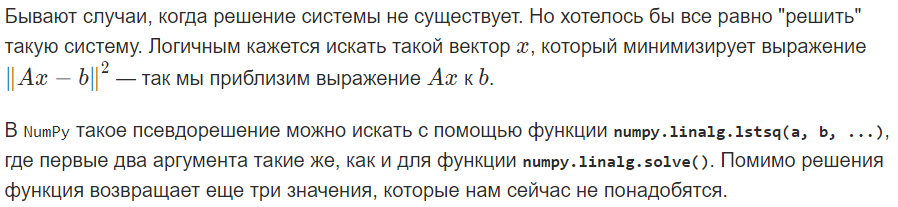

In [36]:
a = np.array([[0, 1], [1, 1], [2, 1], [3, 1]])
b = np.array([-1, 0.2, 0.9, 2.1])
x, res, r, s = np.linalg.lstsq(a, b)

print("Матрица A:\n", a)
print("Вектор b:\n", b)
print("Псевдорешение системы:\n", x)
print("Проверка:\n", np.dot(a, x))

Матрица A:
 [[0 1]
 [1 1]
 [2 1]
 [3 1]]
Вектор b:
 [-1.   0.2  0.9  2.1]
Псевдорешение системы:
 [ 1.   -0.95]
Проверка:
 [-0.95  0.05  1.05  2.05]


C:\Users\artem\AppData\Local\Temp\ipykernel_18772\1716137481.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x, res, r, s = np.linalg.lstsq(a, b)


### Обратные матрицы (для квадратных невырожденных)

In [37]:
a = np.array([[1, 2, 1], [1, 1, 4], [2, 3, 6]], dtype=np.float32)
b = np.linalg.inv(a)

print("Матрица A:\n", a)
print("Обратная матрица к A:\n", b)
print("Произведение A на обратную должна быть единичной:\n", a.dot(b))

Матрица A:
 [[1. 2. 1.]
 [1. 1. 4.]
 [2. 3. 6.]]
Обратная матрица к A:
 [[ 6.  9. -7.]
 [-2. -4.  3.]
 [-1. -1.  1.]]
Произведение A на обратную должна быть единичной:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Собственные числа и собственные вектора матрицы (для квадратных)

Собственный вектор матрицы задает направление, вдоль которого соответствующее линейное преобразование действует как сжатие или растяжение.

**Собственным вектором** матрицы A называется такой ненулевой вектор x, что для вещественного λ выполняется **Ax=λx** (т.е. вектор после линейного преобразования может или рястянуться, или сжаться, но не поменять направление в пространстве).

При этом λ называется **собственным числом** матрицы A.

In [38]:
a = np.array([[-1, -6], [2, 6]])
w, v = np.linalg.eig(a)

print("Матрица A:\n", a)
print("Собственные числа:\n", w)
print("Собственные векторы:\n", v)

Матрица A:
 [[-1 -6]
 [ 2  6]]
Собственные числа:
 [2. 3.]
Собственные векторы:
 [[-0.89442719  0.83205029]
 [ 0.4472136  -0.5547002 ]]


В качестве результата эта функция выдает одномерный массив w собственных чисел и двумерный массив v, в котором по столбцам записаны собственные вектора, так что вектор v[:, i] соотвествует собственному числу w[i] (т.е. первому с.ч. соответствует первый столбец и т.д.).

**Важно**: у вещественной матрицы собственные значения или собственные векторы могут быть комплексными.

### Комплексные числа

In [44]:
a = 3 + 2j
b = 1j

print("Комплексное число a:\n", a)
print("Комплексное число b:\n", b)

Комплексное число a:
 (3+2j)
Комплексное число b:
 1j


complex

#### Арифметические операции с комплексными числами

In [1]:
c = a * a
d = a / (4 - 5j)

print("Комплексное число c:\n", c)
print("Комплексное число d:\n", d)

NameError: name 'a' is not defined

In [19]:
a = np.eye(4, 5)
print(a)
a[[0, 3], [1, 3]]

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


array([0., 1.])